In [1]:
#Import
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits


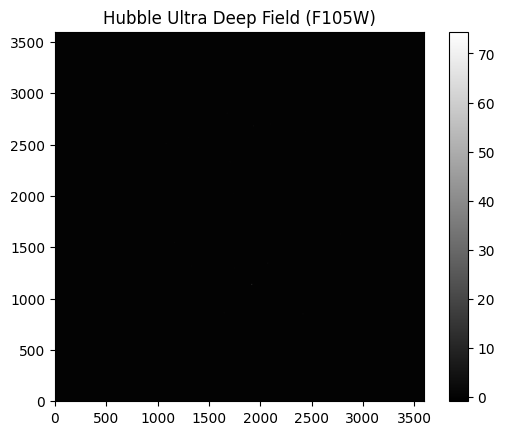

<Figure size 640x480 with 0 Axes>

In [2]:
# f105w
hubble_fits_file = 'hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (2).fits'
hdulist = fits.open(hubble_fits_file)
hubble_data = hdulist[0].data
image_data = hdulist[0].data

# HUDF image
plt.imshow(hubble_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Hubble Ultra Deep Field (F105W)")
plt.show()

# Save the HUDF image
plt.savefig('hubble_f105w_image.png')



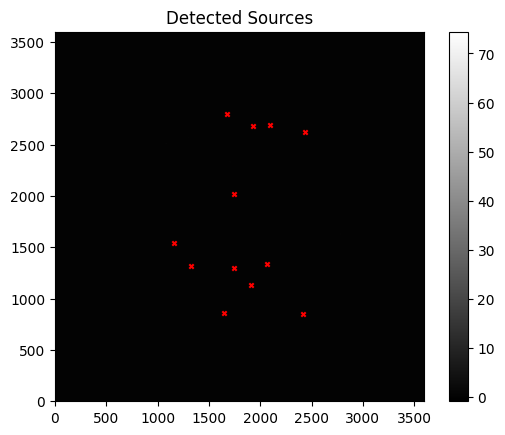

<Figure size 640x480 with 0 Axes>

In [3]:

image_data = image_data.byteswap().newbyteorder()

# source
sources = sep.extract(image_data, thresh=1.5, minarea=5)


# Plot
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.scatter(sources['x'], sources['y'], s=10, color='red', marker='x')
plt.title("Detected Sources")
plt.show()

# Save
plt.savefig('source_detection.png')


Number of sources found: 12
Mean flux: 144.31153766314188
Median flux: 58.161333084106445
Standard deviation of fluxes: 266.7105256926577
Largest outlier flux: 1007.1629638671875
Outlier location: (x, y) = (1914.2108267046065, 1134.459217511109)
Outlier is 3.24 standard deviations away from the mean.


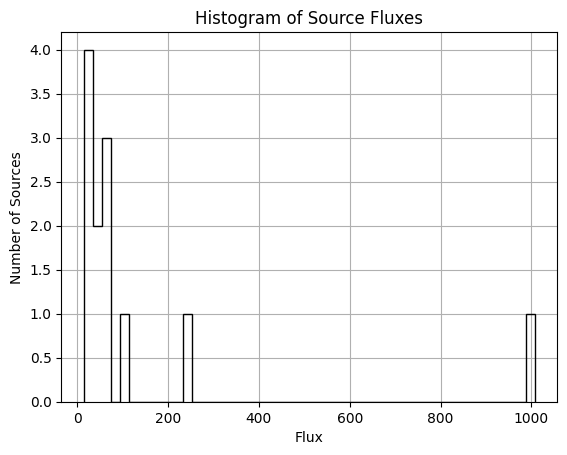

In [4]:
num_sources = len(sources)
print(f"Number of sources found: {num_sources}")

# Extract the fluxes of the sources
fluxes = sources['flux']


fluxes = sources['flux']

# Mean, median, and mode
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

#Print Results
print(f"Mean flux: {mean_flux}")
print(f"Median flux: {median_flux}")
print(f"Standard deviation of fluxes: {std_flux}")

#largest outlier: the flux that is farthest from the mean
flux_diff = np.abs(fluxes - mean_flux)
max_outlier_index = np.argmax(flux_diff)
max_outlier_flux = fluxes[max_outlier_index]
x_outlier = sources['x'][max_outlier_index]
y_outlier = sources['y'][max_outlier_index]

# standard deviations the outlier is away from the mean
outlier_std_devs = (max_outlier_flux - mean_flux) / std_flux

# Print 
print(f"Largest outlier flux: {max_outlier_flux}")
print(f"Outlier location: (x, y) = ({x_outlier}, {y_outlier})")
print(f"Outlier is {outlier_std_devs:.2f} standard deviations away from the mean.")

# Plot Histogram
plt.hist(fluxes, bins=50, histtype='step', color='black')
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.title('Histogram of Source Fluxes')
plt.grid(True)
plt.show()

3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.
